## REST API

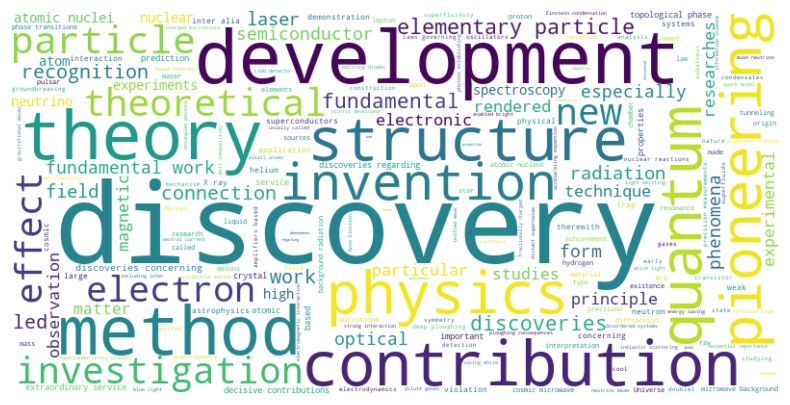

In [1]:
import requests  # Importing requests to make HTTP requests
import json  # Importing json to prettify the print output
from wordcloud import WordCloud  # Importing WordCloud for generating word cloud
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Making a get request for the url
url = "http://api.nobelprize.org/2.1/nobelPrizes?sort=asc&nobelPrizeYear=1901&yearTo=2022&nobelPrizeCategory=phy&format=json&csvLang=en&limit=200"
response = requests.get(url)

# Extracting the data as JSON
data = response.json()

# Extracting the motivations for nobel prizes
motivations = []
for prize in data['nobelPrizes']:
    if 'laureates' in prize:
        for laureate in prize['laureates']:
            motivations.append(laureate['motivation']['en'])

motivationtext = " ".join(motivations)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(motivationtext)

# Displaying the word cloud as a figure
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The code above is fetching the physics nobel prize data from an API.
It extracts the "motivation" for each laureate who received the prize, combines the motivations into a single text string and generates and displays a word cloud highlighting the most frequent words in the motivations.

## Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display

base_url = "https://books.toscrape.com/"
start_url = "https://books.toscrape.com/catalogue/page-{}.html"
all_books_data = []

# We'll scrape the first 3 pages (page 1 to 3)
for page_num in range(1, 4):
    url = start_url.format(page_num)
    response = requests.get(url) 
    soup = BeautifulSoup(response.content.decode('utf-8'), 'html.parser')

    # Each book is in a product_pod class
    books = soup.select('article.product_pod') 
    
    for book in books: # Loop through all the books in the page
        # Extract book title and relative URL
        title_element = book.select_one('h3 > a') # The title is in an anchor tag inside an h3 tag
        title = title_element['title'] # 
        relative_link = title_element['href']       
        # The URLs in the listing pages start with "../"
        detail_url = base_url + "catalogue/" + relative_link.replace('../', '')

        # Extract price
        price = book.select_one('p.price_color').text.strip()

        # Extract rating
        rating_element = book.select_one('p.star-rating')
        rating = [c for c in rating_element['class'] if c != 'star-rating'][0] 

        # Finding UPC from detail page
        detail_resp = requests.get(detail_url) # Make a GET request to the detail page
        detail_soup = BeautifulSoup(detail_resp.content.decode('utf-8'), 'html.parser') # Parse the HTML content

        # The UPC is located in the product information table
        product_info_table = detail_soup.select('table.table.table-striped tr')
        upc = ''
        for row in product_info_table:
            heading = row.select_one('th').text.strip()
            if heading == 'UPC':
                upc = row.select_one('td').text.strip()
                break
        
        # Append extracted data
        all_books_data.append((upc, title, price, rating))

df = pd.DataFrame(all_books_data, columns=['upc', 'title', 'price', 'rating'])

display(df.head(6))

For this task we systematically scrape book information (title, price, rating, and UPC) from the "Books to Scrape" website across the first three pages. The code uses two nested loops to scrape data for books. For each book, a separate GET request is sent to the detail page (detail_url) and the UPC is extracted from the product information table using a second loop.
We use pandas to store the data in a better format. From there we create a table from the dataframe and displays six books. 